#### Random Sample Imputation

The main aim of this imputation is that it takes random observations from the dataset and we use this observation to replace thge nan values.


So, when can we actually use this is that when the data is missing completely at random(MCAR).

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('titanic.csv', usecols = ['Fare', 'Age', 'Survived'])

In [6]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [9]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [13]:
df.Age.isnull().mean()

0.19865319865319866

### The above result indicates the percentage of null values in the 'Age' column

In [14]:
### Lets define a function for filling in the null values with random sampling and compare the result with the median imputataion technique as well.

def random_impute(df, variable, median):
    ### First lets define for the median imputation
    df[variable + '_median'] = df[variable].fillna(median)
    df[variable + '_random_sample'] = df[variable]
    ## It will have the sample values to fill na
    random_sample = df[variable].dropna().sample(df['Age'].isnull().sum(), random_state = 0)
    ##In order to merge the dataset pandas need to have the same index. So, let's make the indexes similar
    
    random_sample.index = df[df[variable].isnull()].index
    df.loc[df[variable].isnull(), variable + '_random_sample'] = random_sample
    
    

In [15]:
median = df['Age'].median()
random_impute(df, 'Age', median)

In [17]:
df.head(20)

,Survived,Age,Fare,Age_median,Age_random_sample
0,0,22.0,7.2500,22.0,22.00
1,1,38.0,71.2833,38.0,38.00
2,1,26.0,7.9250,26.0,26.00
3,1,35.0,53.1000,35.0,35.00
4,0,35.0,8.0500,35.0,35.00
5,0,NaN,8.4583,28.0,28.00
6,0,54.0,51.8625,54.0,54.00
7,0,2.0,21.0750,2.0,2.00
8,1,27.0,11.1333,27.0,27.00
9,1,14.0,30.0708,14.0,14.00


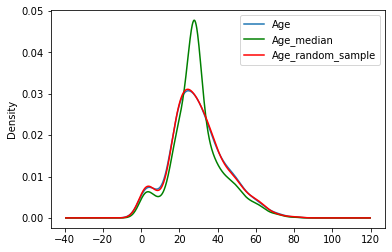

In [23]:
fig = plt.figure() 
z = fig.add_subplot(111) 
df['Age'].plot(kind='kde', ax=z) 
df.Age_median.plot(kind = 'kde', ax = z, color = 'green')
df.Age_random_sample.plot(kind='kde', ax=z, color='red') 
lines, labels = z.get_legend_handles_labels()
z.legend(lines, labels, loc = 'best')

From the above output we can clearly see that random sample technique is the perfect as there is no distortion at all. Random sample curve follows the same path as the original Age column. Ther eis so much variance in the median column.

# Capturing NAN values with a new feature

It works well when the data is not missing completely at random

In [24]:
df = pd.read_csv('titanic.csv', usecols = ['Fare', 'Age', 'Survived'])

In [25]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [29]:
df['Age_NAN'] = np.where(df['Age'].isnull(), 1, 0)

In [31]:
df.head(15)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,NaN,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


In [43]:
df['Age'].fillna(df.Age.median(), inplace = True)

### Captures the importance of the missing values even though I have replaced the nan values with median of the Age variable.

In [42]:
df.head(20)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


# End of Distribution imputation

This technique actually mean that it will be taking the value at the end of the distribution which is the value that comes after 3rd standard deviation

In [44]:
df = pd.read_csv('titanic.csv', usecols = ['Fare', 'Age', 'Survived'])

In [50]:
extreme = df.Age.mean() + 3 * df.Age.std()

/Users/viplavgandra/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


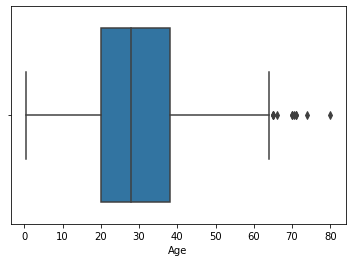

In [49]:
import seaborn as sns
sns.boxplot('Age', data = df);

In [51]:
def beta_impute(df, variable, median, extreme):
    df[variable + '_end_of_distribution'] = df[variable].fillna(extreme)
    df[variable].fillna(median, inplace = True)

In [52]:
beta_impute(df, 'Age', df.Age.median(), extreme)

In [53]:
df.head(20)

,Survived,Age,Fare,Age_end_of_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


<AxesSubplot:>

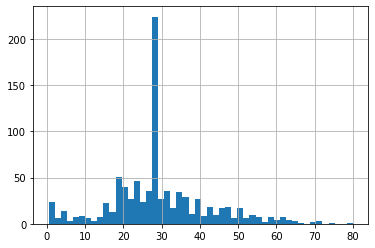

In [54]:
df['Age'].hist(bins = 50)

<AxesSubplot:>

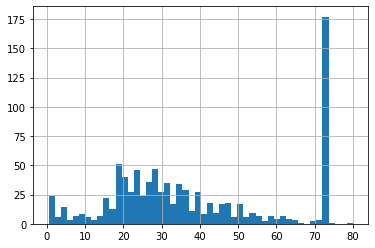

In [55]:
df['Age_end_of_distribution'].hist(bins = 50)

We can see that from the boxplot below there are no outliers at all. 

/Users/viplavgandra/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_of_distribution'>

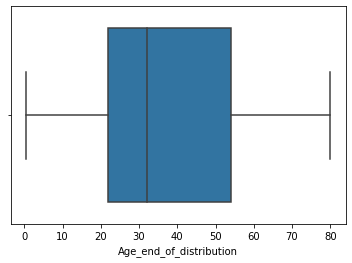

In [56]:
sns.boxplot('Age_end_of_distribution', data = df)